# Transport in Ireland — Exploratory Data Analysis

## Project context
This project analyzes transport-related data in Ireland with the goal of identifying
patterns, trends, and insights relevant for public transport planning and policy.

## Dataset
Source: Central Statistics Office (CSO), Ireland

## Analyst
Christian Leguer

## Objective of this notebook

The objective of this notebook is to:
- Explore transport-related economic indicators in Ireland to understand their structure, consistency, and potential for time-series analysis
- Identify variables, data types, and units
- Detect potential data quality issues
- Prepare the dataset for cleaning and analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [2]:
df = pd.read_csv("../Data/raw/public_transport_cso_raw.csv")
df.head(5)

,Statistic Label,Year,State,UNIT,VALUE
0,Total Imports,1930,State,Euro Thousand,72091
1,Total Imports,1931,State,Euro Thousand,64072
2,Total Imports,1932,State,Euro Thousand,54058
3,Total Imports,1933,State,Euro Thousand,45443
4,Total Imports,1934,State,Euro Thousand,49675


In [3]:
df.tail(5)

,Statistic Label,Year,State,UNIT,VALUE
280,Trade Surplus (Exports Minus Imports),2020,State,Euro Thousand,75065650
281,Trade Surplus (Exports Minus Imports),2021,State,Euro Thousand,61926624
282,Trade Surplus (Exports Minus Imports),2022,State,Euro Thousand,67725215
283,Trade Surplus (Exports Minus Imports),2023,State,Euro Thousand,55735256
284,Trade Surplus (Exports Minus Imports),2024,State,Euro Thousand,89078396


In [4]:
print("1. Shape of the DataSet")
display(df.shape)
print("2. Name of the columns of the DataSet")
display(df.columns)
print("3. Information of the DataSet")
display(df.info())

1. Shape of the DataSet


(285, 5)

2. Name of the columns of the DataSet


Index(['Statistic Label', 'Year', 'State', 'UNIT', 'VALUE'], dtype='object')

3. Information of the DataSet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  285 non-null    object
 1   Year             285 non-null    int64 
 2   State            285 non-null    object
 3   UNIT             285 non-null    object
 4   VALUE            285 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 11.3+ KB


None

## Variable description (initial understanding)

| Column name      | Suspected meaning                                                | Data type | Notes / doubts |
|------------------|------------------------------------------------------------------|-----------|----------------|
| Statistic Label  | Type of trade metric (imports, exports, trade balance)           | object    | Categorical variable, values need mapping |
| Year             | Year of observation                                              | int       | Time variable (1930–present) |
| State            | Geographic aggregation level (national – Ireland)                | object    | Constant value, low analytical value |
| UNIT             | Unit of measurement for VALUE                                    | object    | Indicates scale (Euro Thousand) |
| VALUE            | Numeric value of the reported statistic                           | float/int | Main metric; needs unit conversion for interpretation |


In [5]:
print("Object columns")
display(df.select_dtypes(include="object").columns)
print("int and float columns")
display(df.select_dtypes(include=["int64","float64"]).columns)

Object columns


Index(['Statistic Label', 'State', 'UNIT'], dtype='object')

int and float columns


Index(['Year', 'VALUE'], dtype='object')

In [6]:
print("Unique values of 'Statistic Label'")
display(df["Statistic Label"].value_counts())
print("Unique values of 'Year'")
display(df["Year"].value_counts())
print("Unique values of 'State'")
display(df["State"].value_counts())
print("Unique values of 'UNIT'")
display(df["UNIT"].value_counts())
print("Unique values of 'VALUE'")
display(df["VALUE"].value_counts())


Unique values of 'Statistic Label'


Statistic Label
Total Imports                            95
Total Exports                            95
Trade Surplus (Exports Minus Imports)    95
Name: count, dtype: int64

Unique values of 'Year'


Year
1930    3
1990    3
1999    3
1998    3
1997    3
       ..
1959    3
1958    3
1957    3
1956    3
2024    3
Name: count, Length: 95, dtype: int64

Unique values of 'State'


State
State    285
Name: count, dtype: int64

Unique values of 'UNIT'


UNIT
Euro Thousand    285
Name: count, dtype: int64

Unique values of 'VALUE'


VALUE
 72091        1
 196029749    1
-26915        1
-21291        1
-20651        1
             ..
 28577        1
 29012        1
 30778        1
 34143        1
 89078396     1
Name: count, Length: 285, dtype: int64

In [7]:
df.columns

Index(['Statistic Label', 'Year', 'State', 'UNIT', 'VALUE'], dtype='object')

## Data understanding summary

### Dataset structure
- Number of rows: 285
- Number of columns: 5

### Key variables identified
- Time variable: Year
- Metric variables: Value
- Categorical descriptors: Statistic Label, UNIT, State

### Data quality observations
- The absence of null values suggests the dataset is complete and does not require imputation at this stage.
- State column contains a constant value and provides limited analytical value
- UNIT column indicates scale (Euro Thousand) and must be considered for interpretation
- VALUE column represents aggregated national-level trade metrics
- The column names will be converted to lowercase for ease of use.

### Next steps
In the next phase, the dataset will be cleaned, types will be corrected,
and the structure will be prepared for analysis.

# Data Preparation
   

In [8]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  285 non-null    object
 1   Year             285 non-null    int64 
 2   State            285 non-null    object
 3   UNIT             285 non-null    object
 4   VALUE            285 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 11.3+ KB


None

,Year,VALUE
count,285.000000,2.850000e+02
mean,1977.000000,2.410576e+07
std,27.470855,4.038081e+07
min,1930.000000,-2.286590e+06
25%,1953.000000,4.397100e+04
50%,1977.000000,1.064108e+06
75%,2001.000000,3.627520e+07
max,2024.000000,2.237340e+08


In [9]:
df.duplicated().sum()

0

In [10]:
df['UNIT'].value_counts()

UNIT
Euro Thousand    285
Name: count, dtype: int64

In [11]:
df = df.sort_values('Year').reset_index(drop = True)

In [12]:
df = df.rename(columns={
    'Statistic Label': 'metric',
    'Year': 'year',
    'State': 'state',
    'UNIT': 'unit',
    'VALUE': 'value'
})

In [13]:
df['value_billion'] = df['value'] / 1_000_000

In [14]:
df.head()

,metric,year,state,unit,value,value_billion
0,Total Imports,1930,State,Euro Thousand,72091,0.072091
1,Trade Surplus (Exports Minus Imports),1930,State,Euro Thousand,-15022,-0.015022
2,Total Exports,1930,State,Euro Thousand,57068,0.057068
3,Total Imports,1931,State,Euro Thousand,64072,0.064072
4,Trade Surplus (Exports Minus Imports),1931,State,Euro Thousand,-17929,-0.017929


## Phase 2 – Data preparation summary

- The dataset does not contain missing values.
- It contains three categorical columns and two numerical columns.
- No duplicated records were found.
- All observations are measured in the same unit (Euro Thousand).
- The dataset was reordered chronologically to allow proper time-series analysis.
- An additional column was created to convert values from thousands to billions in order to improve interpretability.
- These transformations are analytical representations and do not modify the original data source.

After these steps, the dataset is clean, consistent, and ready for exploratory analysis.

# Phase 3 - Exploratory Data Analysis (EDA)

The objective of this phase is to explore the dataset in order to identify trends, patterns, and potential anomalies over time, as well as differences between categories.

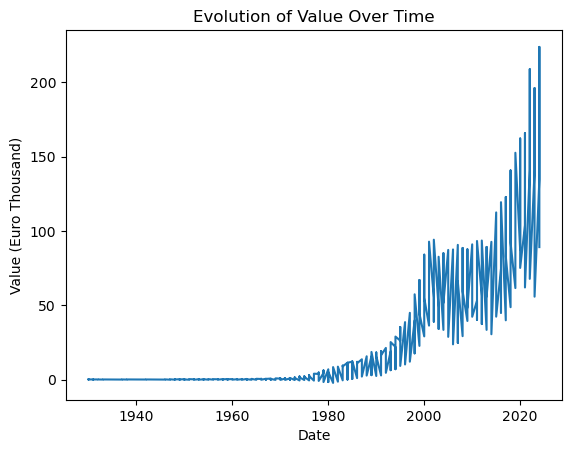

In [15]:
plt.figure()
plt.plot(df['year'], df['value_billion'])
plt.xlabel('Date')
plt.ylabel('Value (Euro Thousand)')
plt.title('Evolution of Value Over Time')
plt.show()

In [16]:
metric_order = [
    'Total Exports',
    'Total Imports',
    'Trade Surplus (Exports Minus Imports)'
]

Metric: Total Exports


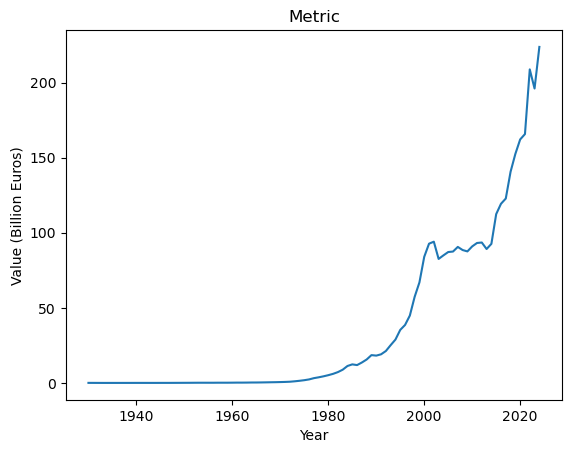

Metric: Total Imports


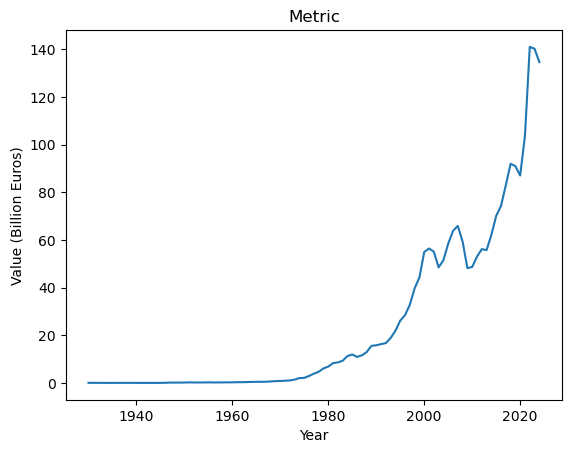

Metric: Trade Surplus (Exports Minus Imports)


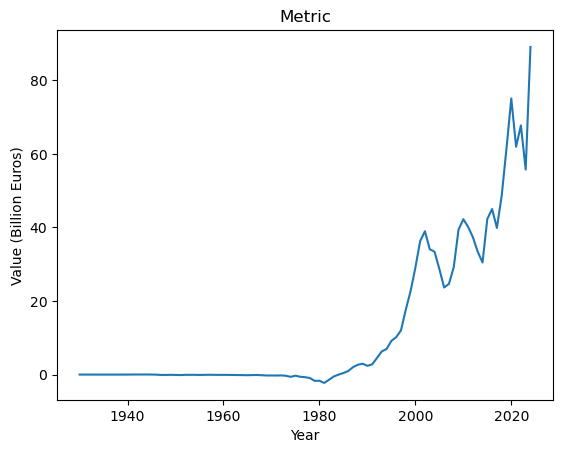

In [17]:
for metric in metric_order:
    print(f"Metric: {metric}")
    subset = df[df['metric'] == metric]
    
    plt.figure()
    plt.plot(subset['year'], subset['value_billion'])
    plt.title('Metric')
    plt.xlabel('Year')
    plt.ylabel('Value (Billion Euros)')
    plt.ticklabel_format(style = 'plain', axis = 'y')
    plt.show()

- Metrics were analyzed in a logical economic order: exports, imports, and trade surplus, to provide a coherent narrative of Ireland’s trade dynamics.

# Exports

- Total Exports show a clear long-term upward trend over the analyzed period.
- Growth appears to accelerate from the late 1990s onwards, indicating a sustained increase in export activity.

# Imports

- Total imports exhibit an overall upward trend, althought with greater volatility compared to export. 
- There are several periods of fluctuation.
- This indicates that import activity is more variable over time.

# Trade Surplus

- The trade surplus remains positive throughout most of the observed period and incrases significantly in later years.
- This indicates that  export growth has generally outpaced import growth.
- As a result, Ireland mantains a strong trade balance over time.

In [18]:
print('Total in Billions')
df_grouped = (
    df
    .groupby('metric')['value_billion']
    .sum()
    .sort_values(ascending = False)
)
df_grouped.head()

Total in Billions


metric
Total Exports                            3435.070468
Total Imports                            2259.273628
Trade Surplus (Exports Minus Imports)    1175.796893
Name: value_billion, dtype: float64

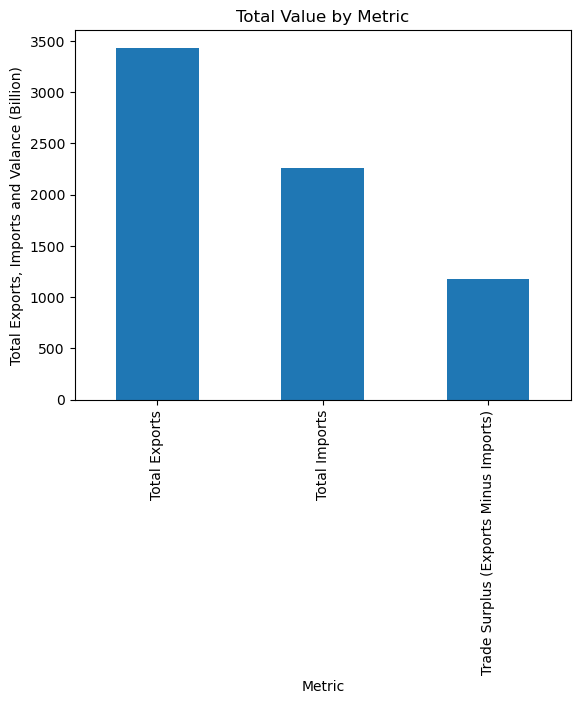

In [22]:
plt.figure()
df_grouped.plot(kind = 'bar')
plt.xlabel('Metric')
plt.ylabel('Total Exports, Imports and Valance (Billion)')
plt.title('Total Value by Metric')
plt.show()

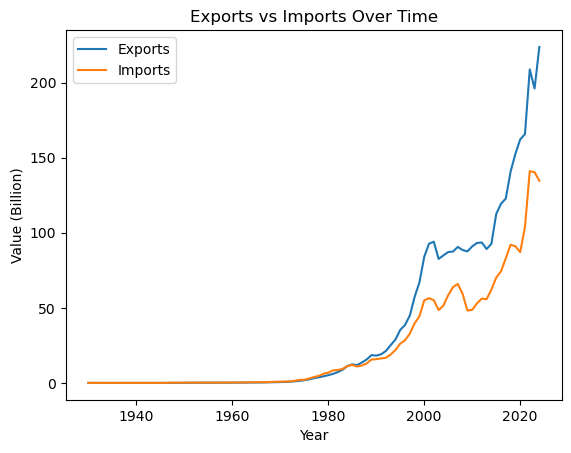

In [21]:
df_pivot = df.pivot(index = 'year', columns = 'metric', values = 'value_billion')

plt.figure()
plt.plot(df_pivot.index, df_pivot['Total Exports'], label = 'Exports')
plt.plot(df_pivot.index, df_pivot['Total Imports'], label = 'Imports')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Value (Billion)')
plt.title('Exports vs Imports Over Time')
plt.show()



# Phase 3 Exploratory Analysis conclusion

The exploratory analysis reveals a sustained growth in international trade over time, with exports consistently outperforming imports. The widening gap between both metrics in recent decades suggests a structurally positive trade balance, while import values display higher volatility, likely reflecting sensitivity to economic cycles.

# Conclusions and Next Steps

### Summary of Findings

In this project, we analyzed the historical evolution of exports, imports, and trade balance over time. The results show a strong long-term growth trend for both exports and imports, with exports consistently exceeding imports across most of the observed period.

This sustained difference results in a positive trade balance, which becomes more pronounced in recent decades. While exports show relatively stable growth, imports exhibit higher volatility, particularly in later years.

---

### Interpretation

The persistent trade surplus suggests a strengthening trade position over time. The widening gap between exports and imports may reflect increased export competitiveness, higher production capacity, or favorable trade dynamics.

The acceleration observed in recent years highlights structural changes in trade behavior, emphasizing the importance of analyzing long-term trends rather than relying on simple aggregate metrics such as averages.

---

### Methodological Notes

To improve interpretability and analytical clarity:

- Monetary values were converted from Euro Thousands to Billions.
- Time-series visualizations were prioritized over aggregated statistics.
- Pivot tables were used to restructure the dataset and enable direct comparison between exports and imports.
- Distribution plots were explored but found to be less informative for time-based analysis.

---

### Limitations

- The dataset is aggregated and lacks sector or country-level detail.
- Values were not adjusted for inflation.
- External economic variables were not included in the analysis.

---

### Next Steps

Potential extensions of this project include:

- Inflation-adjusted analysis of trade values.
- Volatility analysis of trade balance.
- Comparative analysis with other economies.
- Development of an interactive dashboard for enhanced data storytelling.
